In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import ast

#data loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#datacleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

#data filtering for data analyst
df_DA= df[df['job_title_short']=='Data Analyst'].copy()

In [3]:
df_DA_explode = df_DA.explode('job_skills')

In [7]:
df_DA_explode['job_skills'].value_counts()

job_skills
sql          92428
excel        66860
python       57190
tableau      46455
power bi     39380
             ...  
capacitor        1
gtx              1
ovh              1
esquisse         1
chainer          1
Name: count, Length: 235, dtype: int64

In [8]:
df_DA_explode['job_posted_monthno'] = df_DA_explode['job_posted_date'].dt.month

In [10]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_monthno', columns='job_skills', aggfunc='size' , fill_value=0)

In [13]:
df_DA_pivot['job_posted_monthno'] = df_DA_pivot['job_posted_monthno'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

KeyError: 'job_posted_monthno'

In [24]:
df_DA_pivot['job_posted_monthno'] = df_DA_pivot['job_posted_monthno'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

KeyError: 'job_posted_monthno'

In [22]:
df_DA_pivot.reset_index(inplace=True)

In [30]:
df_DA_pivot.set_index('job_posted_monthno', inplace= True)

In [31]:
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_monthno,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


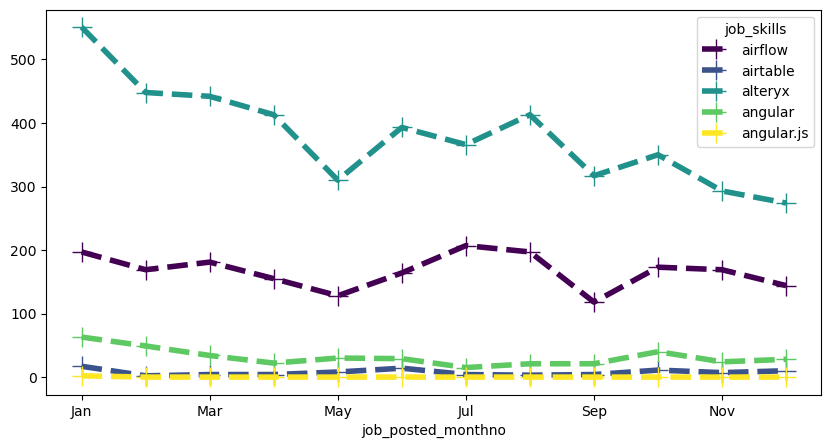

In [46]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth = 4,
    linestyle='--',
    colormap ='viridis',
    marker='+',
    markersize = 15,
    figsize=(10,5))
plt.show()

In [47]:
df_exploded = df_DA.explode('job_skills')

In [48]:
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary =('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


/var/folders/tm/n04439ts2c1gj_0tqdrrz6jr0000gn/T/ipykernel_20885/1448496820.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(skill_stats['skill_count'][i], skill_stats['median_salary'][i], txt, fontsize=9)


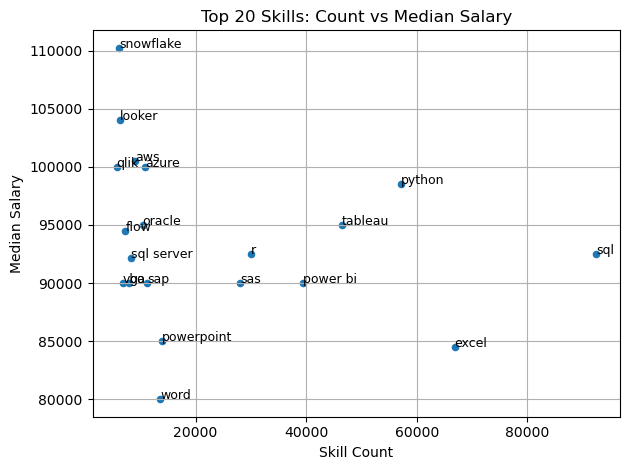

In [50]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title(f'Top {skill_count} Skills: Count vs Median Salary')
plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.grid(True)
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'][i], skill_stats['median_salary'][i], txt, fontsize=9)
#plt.text(50000,90000,"bhp", fontsize=9)
plt.tight_layout()
plt.show()

In [52]:
from adjustText import adjust_text

/var/folders/tm/n04439ts2c1gj_0tqdrrz6jr0000gn/T/ipykernel_20885/1828748173.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.append(plt.text(skill_stats['skill_count'][i], skill_stats['median_salary'][i], txt))


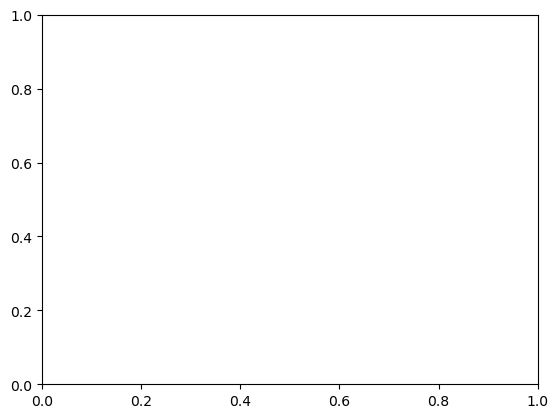

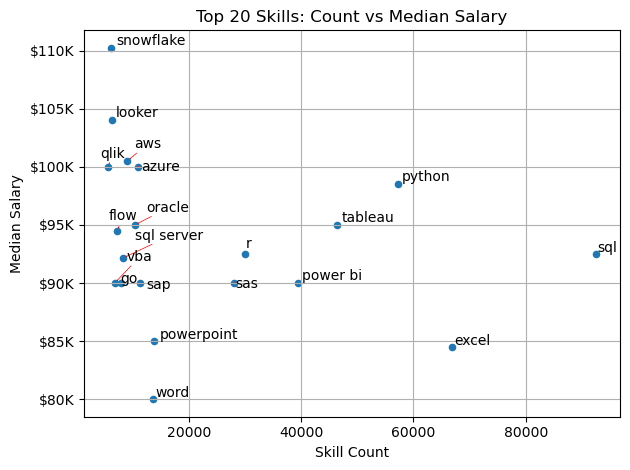

In [64]:
fig , ax = plt.subplots()
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
text =[]

for i, txt in enumerate(skill_stats.index):
    text.append(plt.text(skill_stats['skill_count'][i], skill_stats['median_salary'][i], txt))
adjust_text(text,
            arrowprops=dict(arrowstyle='->', color='red', linewidth=0.5))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}K".format(int(x/1000))))
    #adjust_text([plt.text(skill_stats['skill_count'][i], skill_stats['median_salary'][i], txt, fontsize=9) 
                # for i, txt in enumerate(skill_stats.index)],
            #arrowprops=dict(arrowstyle='->', color='red'))
#plt.text(50000,90000,"bhp", fontsize=9)
plt.title(f'Top {skill_count} Skills: Count vs Median Salary')
plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.grid(True)
plt.tight_layout()
plt.show()